# Model Evaluation and Refinement
 - model Evaluation
    1. split test & train
    2. cross validation score
 - over-fitting, under fitting
    1. check for polynomial feature with different order
    2. check for which order does the overfitting start
 - ridge rigression
    1. polynomial feature & fit transform
    2. different alpha value and determine the best alpha value (tqdm library)
 - grid search
    1. create dictionary parameters with different alpha vlaues
    2. fit the data into grid model and find the best alpha value 


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [3]:
car_model=pd.read_csv('datasets/module_5_auto.csv')
car_model.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
car_data=car_model._get_numeric_data()

In [5]:
car_data.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis=1,inplace=True)

In [6]:
car_data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [41]:
def DistribuionPlot(RedFunction,BlueFunction, RedName, BlueName, Title):
    sns.kdeplot(RedFunction, color='r', label=RedName)
    sns.kdeplot(BlueFunction, color='b', label=BlueName)
    

In [73]:
def pollyplot(xtrain,xtest,ytrain,ytest,lr,poly_transform):
    xmax=max([xtrain.values.max(),xtest.values.max()])
    xmin=min([xtrain.values.min(),xtest.values.min()])
    x=np.arange(xmin,xmax,0.1)
    plt.plot(xtrain,ytrain,'ro',label='Training Data')
    plt.plot(xtest,ytest,'go',label='Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Part 1: Training and Testing

In [10]:
y_data=car_data['price']

In [11]:
x_data=car_data.drop('price',axis=1)

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=0.10, random_state=1)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((180, 18), (21, 18), (180,), (21,))

In [16]:
from sklearn.linear_model import LinearRegression
lm1=LinearRegression()

In [17]:
lm1.fit(xtrain[['horsepower']],ytrain)

LinearRegression()

In [18]:
lm1.score(xtest[['horsepower']],ytest)

0.36358755750788263

In [19]:
lm1.score(xtrain[['horsepower']],ytrain)

0.6619724197515104

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=0.4, random_state=1)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((120, 18), (81, 18), (120,), (81,))

In [21]:
lm2=LinearRegression()
lm2.fit(xtrain[['horsepower']],ytrain)

LinearRegression()

In [23]:

print(f'{lm2.score(xtest[["horsepower"]],ytest)} and {lm2.score(xtrain[["horsepower"]],ytrain)} ')

0.6111827529454426 and 0.6755325771980134 


# cross-validation score

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
rcross=cross_val_score(lm1,x_data[['horsepower']],y_data,cv=4)

In [27]:
rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [29]:
print("The mean of the folds are", rcross.mean(), "and the standard deviation is" , rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [31]:
rcross2=cross_val_score(lm1,x_data[['horsepower']],y_data,cv=2)
rcross2.mean()

0.5166761697127429

# overfitting, underfitting and model selection

In [32]:
lr=LinearRegression()
lr.fit(xtrain[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], ytrain)

LinearRegression()

In [38]:
yhat_train=lr.predict(xtrain[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([26091.37901214,  7954.34606626, 26091.37901214, 19557.5951667 ,
        5822.61408773])

In [39]:
yhat_test=lr.predict(xtest[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11353.32523898,  5751.32764209, 11187.28797374,  6595.61698627,
       15737.79921748])

E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


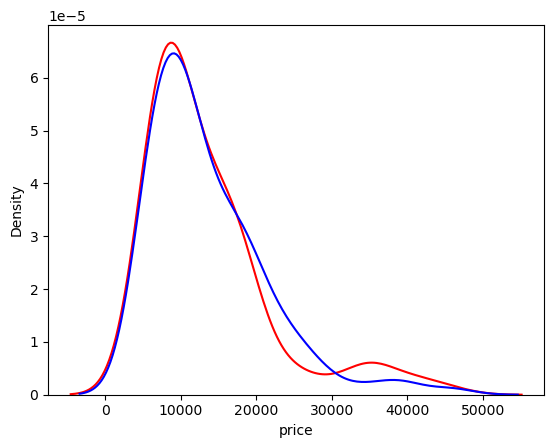

In [42]:
title='distribution plot of predicted value using traning data vs training data distribution'
DistribuionPlot(ytrain,yhat_train,'actual','predicted',title)

E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


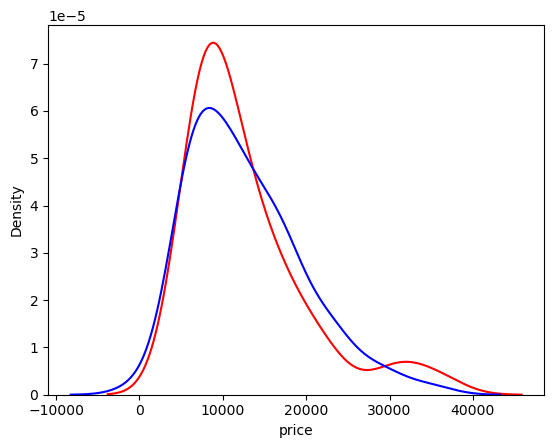

In [43]:
title='distribution plot of predicted value using test data vs test data distribution'
DistribuionPlot(ytest,yhat_test,'actual','predicted',title)

In [44]:
# check if polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# overfitting 

In [65]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [66]:
pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(xtrain[['horsepower']])
x_test_pr=pr.fit_transform(xtest[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [67]:
poly=LinearRegression()
poly.fit(x_train_pr,ytrain)

LinearRegression()

In [68]:
yhat=poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65566037,  7307.9878638 , 12213.7877412 , 18893.24796457,
       19995.95185894])

In [69]:
yhat[0:5],ytest[0:5].values
print(f'predict {yhat[0:5]} actual {ytest[0:5].values}')

predict [ 6728.65566037  7307.9878638  12213.7877412  18893.24796457
 19995.95185894] actual [ 6295. 10698. 13860. 13499. 15750.]


In [70]:
poly.score(x_train_pr,ytrain)

0.5567716902121584

In [71]:
poly.score(x_test_pr,ytest)

-29.871340540625305

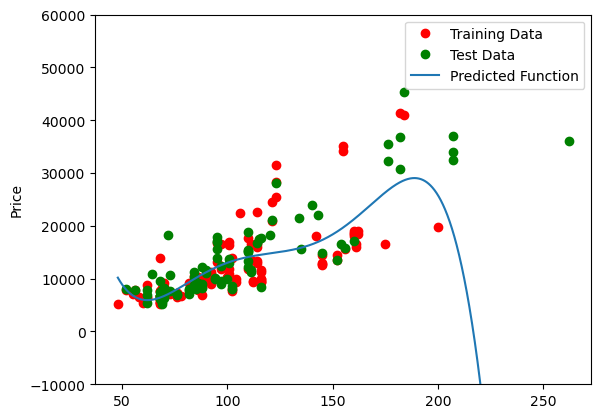

In [74]:
pollyplot(xtrain['horsepower'],xtest['horsepower'],ytrain,ytest,poly,pr)

## the above is overfitted 

Text(3, 0.75, 'Maximum R^2 ')

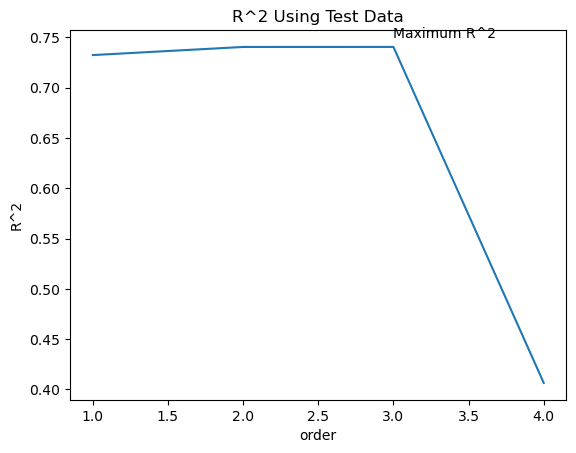

In [61]:
requ_test =[]
order =[1,2,3,4]
for n in order:
    pr=PolynomialFeatures(degree=n)
    x_train_pr=pr.fit_transform(xtrain[['horsepower']])
    x_test_pr=pr.fit_transform(xtest[['horsepower']])
    lr.fit(x_train_pr,ytrain)
    requ_test.append(lr.score(x_test_pr,ytest))
plt.plot(order,requ_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [81]:
def f(order, test_data):
    xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=test_data,random_state=0)
    pr=PolynomialFeatures(degree=order)
    x_train_pr=pr.fit_transform(xtrain[['horsepower']])
    x_test_pr=pr.fit_transform(xtest[['horsepower']])
    poly=LinearRegression()
    poly.fit(x_train_pr,ytrain)
    pollyplot(xtrain['horsepower'],xtest['horsepower'],ytrain,ytest,poly,pr)

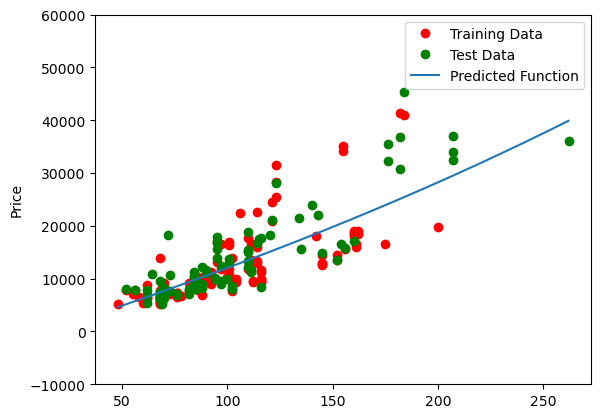

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [82]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

In [83]:
pr1=PolynomialFeatures(degree=2)

In [85]:
x_data=car_data[['horsepower','curb-weight','engine-size','highway-mpg']]
y_data=car_data['price']
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=0.45, random_state=0)
xtrain_pr1=pr1.fit_transform(xtrain)
xtest_pr1=pr1.fit_transform(xtest)

In [88]:
xtrain_pr1.shape,xtest_pr1.shape

((110, 15), (91, 15))

In [90]:
poly=LinearRegression()
poly.fit(xtrain_pr1,ytrain)

LinearRegression()

In [94]:
yhat_train=poly.predict(xtrain_pr1)
yhat_test=poly.predict(xtest_pr1)

E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


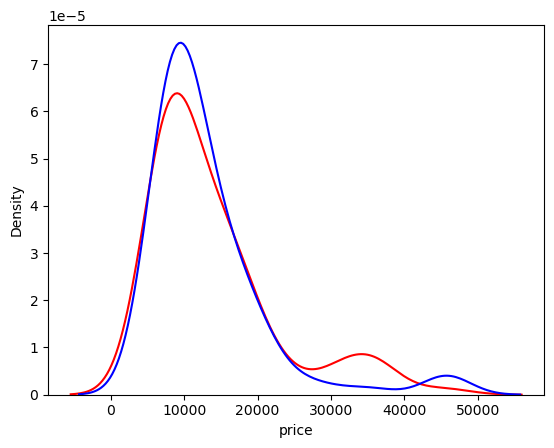

In [96]:
title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistribuionPlot(ytest,yhat_test,'Actual Values','Predict value',title)

- The predicted value is higher than actual value for cars where the price 10,000 range, conversely the predicted price is lower than the price cost in the 30,000 to 40,000 range. As such the model is not as accurate in these ranges.

# Ridge Regression
-  how the parameter alpha changes the model. Just a note, here our test data will be used as validation data

In [102]:
pr=PolynomialFeatures(degree=2)
x_data=car_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']]
y_data=car_data['price']
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=0.45, random_state=0)
x_train_pr=pr.fit_transform(xtrain[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(xtest[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [103]:
from sklearn.linear_model import Ridge

In [104]:
ridge_model=Ridge(alpha=1)

In [105]:
ridge_model.fit(x_train_pr,ytrain)

Ridge(alpha=1)

In [109]:
yhat=ridge_model.predict(x_test_pr)
yhat[0:5], ytest[0:5].values

(array([ 6570.82441941,  9636.24891471, 20949.92322737, 19403.60313256,
        21397.69847683]),
 array([ 6295., 10698., 13860., 13499., 15750.]))

In [110]:
from tqdm import tqdm

In [117]:
rsqu_test=[]
rsqu_train=[]
Alpha=10* np.array(range(0,1000))
pbar=tqdm(Alpha)

for alpha in pbar:
    ridge_model=Ridge(alpha=alpha)
    ridge_model.fit(x_train_pr,ytrain)
    test_score,train_score=ridge_model.score(x_test_pr,ytest),ridge_model.score(x_train_pr,ytrain)
    pbar.set_postfix({'Test score':test_score,'train_score':train_score})
    rsqu_train.append(train_score)
    rsqu_test.append(test_score)


100%|████████████████████████████████████████| 1000/1000 [00:05<00:00, 192.59it/s, Test score=0.564, train_score=0.859]


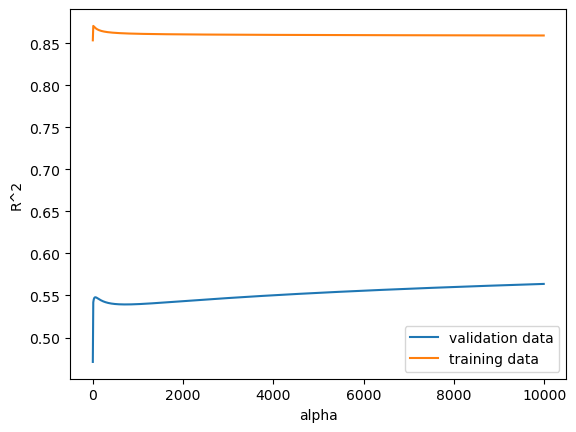

In [118]:
plt.plot(Alpha,rsqu_test,label='validation data')
plt.plot(Alpha,rsqu_train,label='training data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [119]:
ridgeModel=Ridge(alpha=10)
ridgeModel.fit(x_train_pr,ytrain)
ridge_model.score(x_test_pr,ytest)

0.5637701868993686

# Grid Search
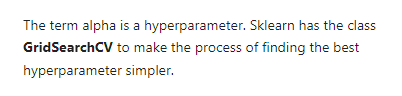

In [120]:
from sklearn.model_selection import GridSearchCV

In [163]:
parameters1=[{'alpha':[0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

In [164]:
RR=Ridge()
RR

Ridge()

In [165]:
Grid1=GridSearchCV(RR,parameters1,cv=4)

In [166]:
x_data=car_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
x_data.isna()
y_data=car_data['price']
Grid1.fit(x_data, y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [168]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [169]:
BestRR.score(xtest[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], ytest)

0.8411649831036149

## grid search for the alpha parameter and the normalization parameter, then find the best value of parameters 

In [170]:
parameter2=[{'alpha':[0.001,0.1,1,10,100,1000,10000,100000,100000]}]

In [172]:
grid2=GridSearchCV(Ridge(),parameter2,cv=4)
grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
best_alpha=grid2.best_params_['alpha']
best_ridge_model=Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Ridge(alpha=10000)

In [175]:
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=0.3, random_state=0)
yhat_test=best_ridge_model.predict(xtest)

array([ 5423.37096596, 10060.00193364, 19036.13854172, 22361.32201189,
       21330.27846945,  9557.87353663, 13949.48984479,  5711.71292389,
       17926.46646882,  7030.26263415, 11234.06538588, 24606.87990738,
        7033.0049557 ,  8214.68499665, 19258.58848133, 16182.49037106,
        6228.34353398, 13826.25948163,  9747.29048514,  5797.08799186,
        8073.79688718, 12573.66748641, 34230.0888104 ,  7452.30436685,
       10395.71182198, 24387.07672359,  9228.16876094,  9670.39853794,
       18083.1437928 , 34230.0888104 , 28005.8250735 , 10880.71060745,
        7194.36448166, 19310.89252146,  8802.98318042, 11127.04392488,
       13766.31315877, 15762.21269638, 11331.51921402, 15698.0729906 ,
        6744.21197167, 23098.19247057,  9117.70137539, 18193.77377911,
       17372.65096283, 12968.64663712, 17912.8914847 ,  6096.81960612,
        5869.89998537, 10807.58020995, 36349.51745991, 24387.07672359,
       10411.168326  , 11120.77280628,  7173.6836041 ,  5869.89998537,
      

E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


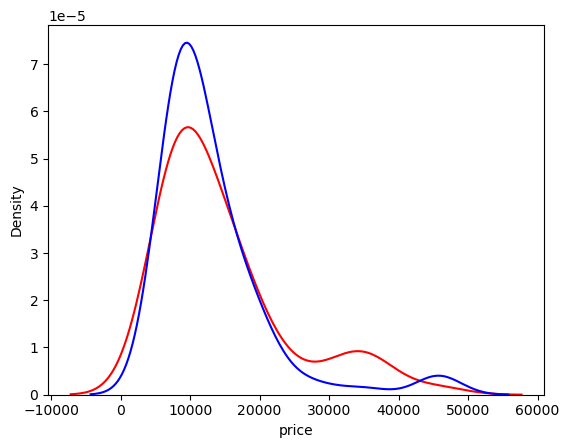

In [176]:
title='ridge model'
DistribuionPlot(ytest,yhat_test,'Actual Values','Predict value',title)